In [38]:
#yolov8

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Desktop/yolov8_vid1.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v8_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object

In [39]:
#yolov5

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Desktop/yolov5_vid1.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v5_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [41]:
#yolov3

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Desktop/yolov3_vid1.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v3_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [48]:
#SSD

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Desktop/vid1_ssd.csv'
necessary_objects_path = '/Users/rupakraut/Desktop/classes.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame Number', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_ssd_df = unique_detections_df.groupby('Object')['Confidence Score'].mean().reset_index()

necessary_objects_df = pd.read_csv(necessary_objects_path)

filtered_mean_confidence_ssd_df = mean_confidence_ssd_df[mean_confidence_ssd_df['Object'].isin(necessary_objects_df['Objects'])]


In [43]:
#detectron

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Desktop/detect_vid1.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_det_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_det_df)

         Object  Confidence
0         bench    0.816780
1           car    0.768460
2         chair    0.766217
3       frisbee    0.737479
4       handbag    0.770444
5        person    0.997518
6  potted plant    0.795525
7         truck    0.917601
8      umbrella    0.758019


In [51]:
import pandas as pd

df1 = mean_confidence_v8_df
df2 = mean_confidence_v5_df
df3 = mean_confidence_v3_df
df4 = filtered_mean_confidence_ssd_df
df5 = mean_confidence_det_df

# Identify unique objects across all dataframes
unique_objects = pd.unique(df1['Object'].tolist() + df2['Object'].tolist() + df3['Object'].tolist() + 
                           df4['Object'].tolist() + df5['Object'].tolist())

# Create a new dataframe with unique objects
combined_df = pd.DataFrame(unique_objects, columns=['Object'])

# Merge the original dataframes with the new dataframe
combined_df = combined_df.merge(df1, on='Object', how='left').rename(columns={'Confidence': 'Confidence_1'})
combined_df = combined_df.merge(df2, on='Object', how='left').rename(columns={'Confidence': 'Confidence_2'})
combined_df = combined_df.merge(df3, on='Object', how='left').rename(columns={'Confidence': 'Confidence_3'})
combined_df = combined_df.merge(df4, on='Object', how='left').rename(columns={'Confidence Score': 'Confidence_4'})
combined_df = combined_df.merge(df5, on='Object', how='left').rename(columns={'Confidence': 'Confidence_5'})
combined_df = combined_df.fillna(0)

combined_df = combined_df[:12]
print(combined_df)
# Now combined_df has one column for objects and three columns for confidences

          Object  Confidence_1  Confidence_2  Confidence_3  Confidence_4  \
0       backpack      0.324322      0.332606      0.259097      0.253766   
1   baseball bat      0.265569      0.000000      0.356125      0.172124   
2          bench      0.260719      0.405148      0.283097      0.254764   
3            car      0.352665      0.345960      0.359172      0.205124   
4        frisbee      0.331689      0.401698      0.000000      0.177462   
5        handbag      0.334265      0.316137      0.392830      0.373602   
6         person      0.858184      0.843945      0.885795      0.779649   
7     skateboard      0.316834      0.287058      0.000000      0.215345   
8          truck      0.719170      0.710240      0.743331      0.239588   
9        bicycle      0.000000      0.355403      0.000000      0.191999   
10  potted plant      0.000000      0.379959      0.000000      0.000000   
11      airplane      0.000000      0.000000      0.000000      0.359837   

    Confide

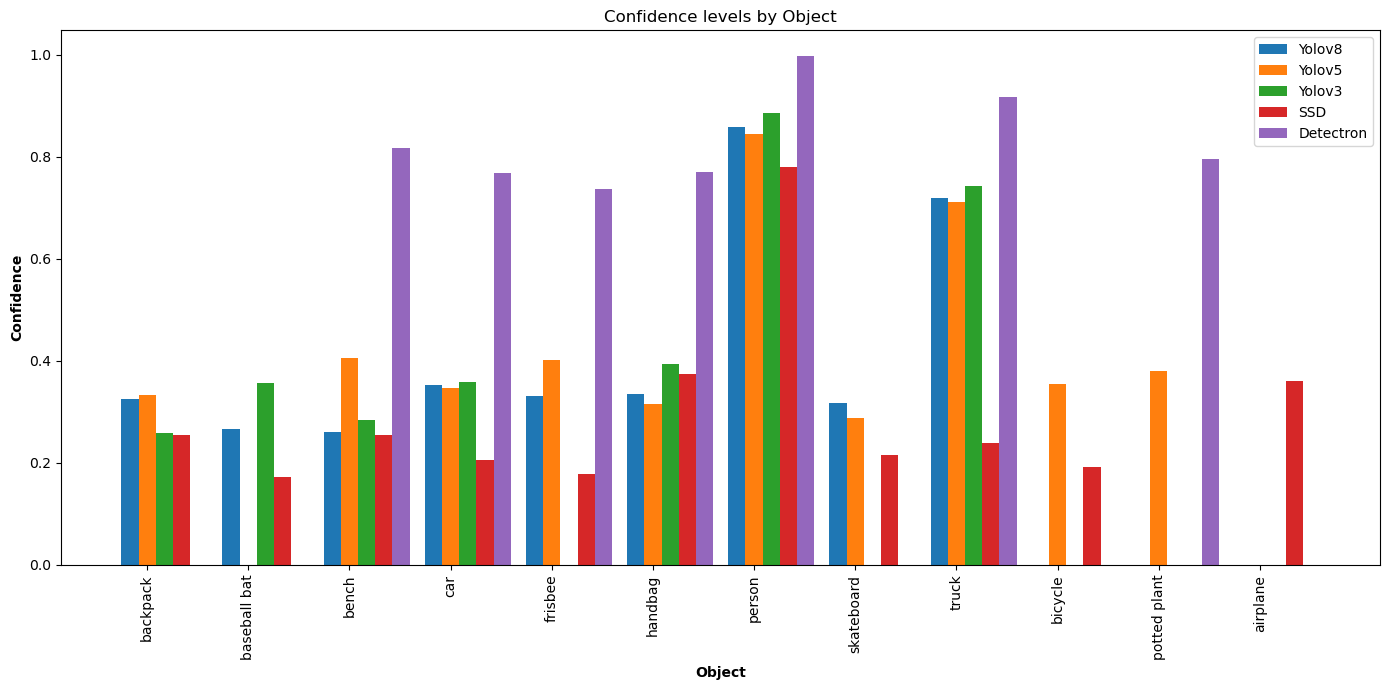

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Define the width of the bars
bar_width = 0.17

# Get the positions of the bars on the x-axis
index = np.arange(len(combined_df))

# Plotting the bars for each confidence
plt.bar(index, combined_df['Confidence_1'], width=bar_width, label='Yolov8')
plt.bar(index + bar_width, combined_df['Confidence_2'], width=bar_width, label='Yolov5')
plt.bar(index + 2*bar_width, combined_df['Confidence_3'], width=bar_width, label='Yolov3')
plt.bar(index + 3*bar_width, combined_df['Confidence_4'], width=bar_width, label='SSD')
plt.bar(index + 4*bar_width, combined_df['Confidence_5'], width=bar_width, label='Detectron')

# Add labels to the x-axis for each group of bars
plt.xlabel('Object', fontweight='bold')
plt.xticks(index + bar_width, combined_df['Object'], rotation=90)

# Add labels and title
plt.ylabel('Confidence', fontweight='bold')
plt.title('Confidence levels by Object')


# Create a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()